Imports for data preparation

In [38]:
import os
import json

from google.colab import drive

Drive mounting

In [15]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data loading

In [39]:
DATA_PREFIX = 'problem-'
PARAGRAPH_SEPARATOR = ' '
PARAGRAPH_SPLIT_REGEX = '\n'
RUN_OVER_FULL_DATA = True
PARTIAL_DATA_INDEX = 50
PARTIAL_DATA_VALIDATION_INDEX = 5

def generate_pair_from_single_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    paragraphs = content.split(PARAGRAPH_SPLIT_REGEX)

    concatenated_paragraphs = []
    for i in range(len(paragraphs) - 1):
        concatenated_paragraphs.append(paragraphs[i] + PARAGRAPH_SEPARATOR + paragraphs[i + 1])

    return concatenated_paragraphs


def generate_pair_paragraphs(directory, partial_data_index):
    generated_input_pairs = []
    count = 0
    for filename in sorted(os.listdir(directory)):
        file_path = os.path.join(directory, filename)

        if (filename.startswith(DATA_PREFIX)):
            count += 1
            pairs_from_file = generate_pair_from_single_file(file_path)
            for i in pairs_from_file:
                generated_input_pairs.append(i)

        if (not RUN_OVER_FULL_DATA) and count > partial_data_index:
            break

    return generated_input_pairs

raw_training_data = generate_pair_paragraphs('/content/drive/My Drive/Colab Notebooks/author-style-detection/data/easy/train', PARTIAL_DATA_INDEX)
raw_validation_data = generate_pair_paragraphs('/content/drive/My Drive/Colab Notebooks/author-style-detection/data/easy/validation', PARTIAL_DATA_VALIDATION_INDEX)


In [40]:
print(len(raw_training_data))

11062


Save the data in single file for faster reading

In [42]:
# replace with raw_validation_data to store raw_validation_data and chose appropriate file name and destination

file_path = '/content/drive/My Drive/Colab Notebooks/author-style-detection/data/easy-all-val-data-single-file.txt'
with open(file_path, 'w') as file:
    for string in raw_training_data:
        file.write(string + '\n')

read_array = []
with open(file_path, 'r') as file:
    for line in file:
        read_array.append(line.strip())

# Print the read array
print(read_array[0])
print(len(read_array))

My point still stands - with all their democracy and freedoms americans were unable to prevent the invasion. Moreover, some Americans even supported the invasion. But no one called them fascists at that time, because everyone knew that it's the government to blame and its lies and propaganda. What's the difference now? Are you implying that we, russians, as a nation are somewhat bad or inferior? Who is a fascist here? These are obviously not laws passed in the interest of "protecting our children", given their callous disregard for life both at home and basically anywhere Russia conducts its foreign policies and "special military operations". It can only be concluded, along with those distracting and dividing with their culture war legislation against the LGBTQ+ community everywhere, that they are just projecting, are hugely insecure in their own sexuality, disproportionately pedophiles themselves, and afraid of allowing that light of justice and truth shine on themselves lest it distu

Data labels parsing

In [43]:
METADATA_PREFIX = 'truth-problem'
RUN_OVER_FULL_DATA = True
PARTIAL_DATA_INDEX = 50
PARTIAL_DATA_VALIDATION_INDEX = 5

def get_pair_labels(directory, partial_data_index):
   pair_labels = []
   count = 0
   for filename in sorted(os.listdir(directory)):
      file_path = os.path.join(directory, filename)

      if (filename.startswith(METADATA_PREFIX)):
          count += 1
          parsed_label_file = parse_metadata_file(file_path)
          pair_labels.append(parsed_label_file['changes'])

      if (not RUN_OVER_FULL_DATA) and count > partial_data_index:
          break

   return pair_labels

def parse_metadata_file(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

def flat_map(func, iterable):
    return [item for sublist in map(func, iterable) for item in sublist]

raw_training_labels = flat_map(lambda x: x, get_pair_labels('/content/drive/My Drive/Colab Notebooks/author-style-detection/data/easy/train', PARTIAL_DATA_INDEX))
raw_validation_labels = flat_map(lambda x: x, get_pair_labels('/content/drive/My Drive/Colab Notebooks/author-style-detection/data/easy/validation', PARTIAL_DATA_VALIDATION_INDEX))

In [45]:
print(len(raw_training_labels))

11062


In [48]:

# Save the array of lists of integers to a text file
file_path = '/content/drive/My Drive/Colab Notebooks/author-style-detection/data/easy-all-val-labels-single-file.txt'
with open(file_path, 'w') as file:
    for integer in raw_validation_labels:
        file.write(str(integer) + '\n')

# Read the content of the text file into a variable as an array of integers
read_array = []
with open(file_path, 'r') as file:
    for line in file:
        read_array.append(int(line.strip()))

# Print the read array
print(read_array)

[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Tokenizing data

Token indices sequence length is longer than the specified maximum sequence length for this model (1738 > 512). Running this sequence through the model will result in indexing errors


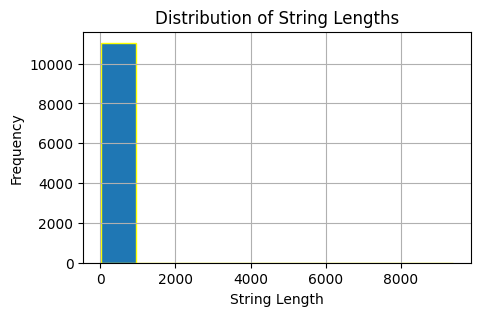

In [50]:
import matplotlib.pyplot as plt

from transformers import RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained('distilroberta-base')

training_data_tokens = tokenizer(raw_training_data)['input_ids']

# Calculate the lengths of the strings
input_lengths = [len(paragraph_of_tokens) for paragraph_of_tokens in training_data_tokens]

# Plot the distribution of string lengths
plt.figure(figsize=(5, 3))
plt.hist(input_lengths, bins=10, edgecolor='yellow')
plt.xlabel('String Length')
plt.ylabel('Frequency')
plt.title('Distribution of String Lengths')
plt.grid(True)
plt.show()

Tokenize data with specific properties based on data statistics
 - we use the diagram to determine what should be the max_length of single input
 - we want 90-95% of the input vectors to have less size than max_length property of tokenization
 - the remaining - 5-10% will be truncated

Model definition with binary classification head to be trained over labeled (0/1) data


In [51]:
import tensorflow as tf

from transformers import TFRobertaModel

# Conver to tensorflow labels
tf_training_labels = tf.convert_to_tensor(raw_training_labels)
tf_validation_labels = tf.convert_to_tensor(raw_validation_labels)


MAX_LENGTH = 512

train_encodings = tokenizer(raw_training_data, truncation=True, padding='max_length', max_length=MAX_LENGTH, return_tensors="tf")
val_encodings = tokenizer(raw_validation_data, truncation=True, padding='max_length', max_length=MAX_LENGTH, return_tensors="tf")

# Load predefined distilroBERTa model
roberta_model = TFRobertaModel.from_pretrained('distilroberta-base')
for layer in roberta_model.layers:
    layer.trainable = True

# Define input layer
input_ids = tf.keras.Input(shape=(MAX_LENGTH,), dtype=tf.int32, name="input_ids")
attention_mask = tf.keras.Input(shape=(MAX_LENGTH,), dtype=tf.int32, name="attention_mask")

# Get the hidden states from the RoBERTa model
roberta_outputs = roberta_model(input_ids, attention_mask=attention_mask)
roberta_last_hidden_state = roberta_outputs.last_hidden_state

# Extract cls tokens
cls_output = roberta_last_hidden_state[:, 0, :]

# Add a dropout layer
cls_output = tf.keras.layers.Dropout(0.1)(cls_output)

# Add a binary dense layer for classification
logits = tf.keras.layers.Dense(1, activation='sigmoid')(cls_output)

# Define the model
model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=logits)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 512)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 512)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_roberta_model_4 (TFRobe  TFBaseModelOutputWithPooli   8211840   ['input_ids[0][0]',           
 rtaModel)                   ngAndCrossAttentions(last_   0          'attention_mask[0][0]']      
                             hidden_state=(None, 512, 7                                     

In [52]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


Training the model

In [53]:
BATCH_SIZE = 8
EPOCHS = 3

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
   {'input_ids': train_encodings['input_ids'], 'attention_mask': tf.ones_like(train_encodings['attention_mask'], dtype=tf.int32)}, tf_training_labels,
   validation_data=({'input_ids': val_encodings['input_ids'], 'attention_mask': tf.ones_like(val_encodings['attention_mask'], dtype=tf.int32)}, tf_validation_labels),
   epochs=EPOCHS,  # Set the number of epochs
   batch_size=BATCH_SIZE  # Set the batch size
)

Epoch 1/3
  71/1383 [>.............................] - ETA: 13:11 - loss: 0.6584 - accuracy: 0.8996

KeyboardInterrupt: 

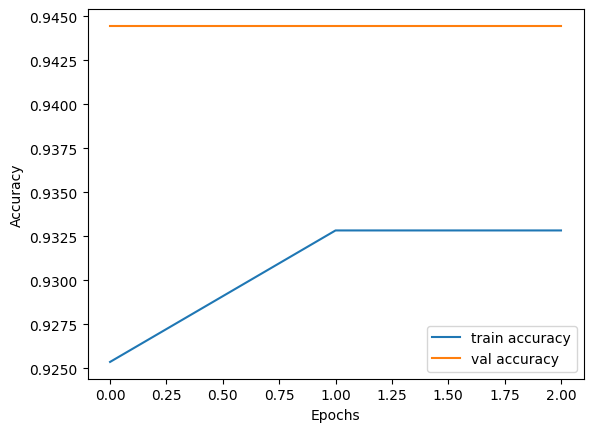

In [34]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Remove classification head after weights are updated and get embeddings of the input


In [35]:
embedding_model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=roberta_last_hidden_state)
input_embeddings = embedding_model.predict({'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask']})[:, 0, :]

print(input_embeddings)

5/5 [==============================] - 9s 491ms/step
[[-0.01787803  0.04784005  0.08829154 ... -0.17860562  0.0053901
   0.3180554 ]
 [-0.01787783  0.04783944  0.08829157 ... -0.178606    0.00538989
   0.31805542]
 [-0.01787797  0.04783968  0.08829147 ... -0.17860596  0.00539
   0.31805545]
 ...
 [-0.01787801  0.04783982  0.0882915  ... -0.17860596  0.00539002
   0.3180557 ]
 [-0.01787771  0.04783836  0.08829112 ... -0.17860702  0.00538953
   0.31805578]
 [-0.0178778   0.04783862  0.08829115 ... -0.17860672  0.00538959
   0.31805584]]
